# Validation of the keymark data based parameter fit with extended data from the installation manual for the heatpump AIT SWCV162(H)K3

The aim is to model the energetic behavior of heat pump as good as possible with only the few data points from keymark data. In addition, it should be identified which two of the four variables (P_el, P_th, COP, eta) can be fitted best / easiest / most robust. The other two variables can then be calculated.

**Manufacturer Data** as reference (titled **"_ref"**):
- Data is based on installation manual and covers a wide range of input temperatures (-20 ° C to + 30 ° C).
- Data is located in heatpump_Vitocal200_diagramm.csv

**Keymark Data** (titled **"_key"**)
- Data is based on Heatpumpkeymark-Database
- Data is located in heatpump_Vitocal200_keymark.csv

**Fit Data** (titled **"_fit"**)
- The fit of the eletrical power (P_el), thermal power (P_th) and coefficient of performance (COP) is done for **_ref** data as well as for **_key** data
- The fit function is done regarding [[1]] by a least-square fit to identify the parameters (p1, p2, p3) with the following function:

```
z = p1x + p2y + p3
```

[[1]] K. Schwamberger, Modellbildung und Regelung von Gebäudeheizungsanlagen mit Wärmepumpen, Fortschrittberichte VDI (263), ISBN: 9783181463062 

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
import itertools
import matplotlib.pyplot as plt
#from matplotlib import cm

In [2]:
# function for fitting with relation to T_in and T_out
# x=T_in, y=T_out, z= size to fit

def fit_simple(x,y,z):
    p0=[0.1,0.001,1.] # starting values
    a=(x,y,z) 
    para,_ = scipy.optimize.leastsq(func_simple_zero,p0,args=a)
    return para

def func_simple_zero(para, x, y, z):
    k1,k2,k3 = para
    z_calc = k1*x + k2*y + k3
    z_diff = z_calc - z
    return z_diff

# Function to calculate z using parameters and any x and y:
def func_simple(para, x, y):
    k1,k2,k3 = para
    z = k1*x + k2*y + k3
    return z

## Import manfufacturer data as reference
With the help of the software "EngaugeDigitizer", the reference values of the Viessmann Vitocal 200 were transferred from the graphical plot into a CSV, see "heatpump_wpl13_diagramm.png" as PNG and CSV file.

In [3]:
data_ref = pd.read_csv('diagramm.csv', delimiter=',', decimal=',')
# calculate COP and quality grade (eta)
K = 273.15
data_ref['T_in'] = data_ref['T_in'].astype(float)
data_ref['T_out'] = data_ref['T_out'].astype(float)
data_ref['COP'] = data_ref['P_th'] / data_ref['P_el']
eta_carnot_ref = (data_ref['T_out']+K) / ((data_ref['T_out']+K)-(data_ref['T_in']+K))
data_ref['eta'] = data_ref ['COP'] / eta_carnot_ref
data_ref.fillna(0, inplace=True)
a=35 #Temperatur levels of fit
b=55 #Temperatur levels of fit
c=65 #Temperatur levels of fit

Text(0, 0.5, 'eta')

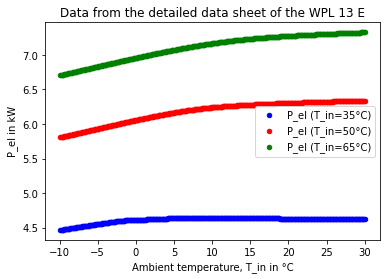

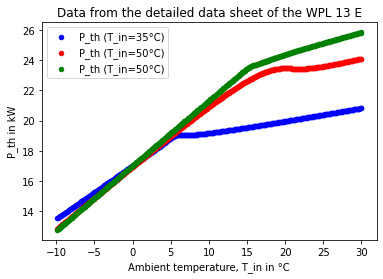

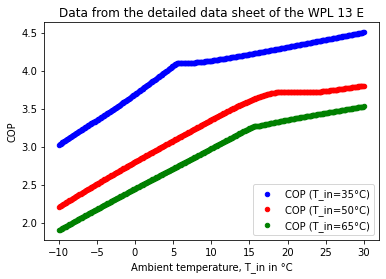

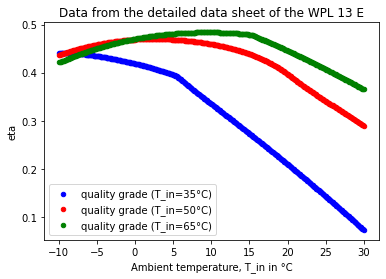

In [4]:
# plot
# P_el
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el (T_in=35°C)', c='Blue',title='Data from the detailed data sheet of the WPL 13 E')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el (T_in=50°C)', c='Red')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el (T_in=65°C)', c='Green')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("P_el in kW")
# P_th
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th (T_in=35°C)', c='Blue', title='Data from the detailed data sheet of the WPL 13 E')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th (T_in=50°C)', c='Red')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th (T_in=50°C)', c='Green')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("P_th in kW")
# COP
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='COP', kind='scatter', label='COP (T_in=35°C)', c='Blue', title='Data from the detailed data sheet of the WPL 13 E')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='COP', kind='scatter', label='COP (T_in=50°C)', c='Red')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='COP', kind='scatter', label='COP (T_in=65°C)', c='Green')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("COP")
# eta
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='quality grade (T_in=35°C)', c='Blue', title='Data from the detailed data sheet of the WPL 13 E')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='quality grade (T_in=50°C)', c='Red')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='quality grade (T_in=65°C)', c='Green')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("eta")

## Import the keymark data

* [ ] csv file to format from database
* [ ] pdf file to folder

In [11]:
data_key = pd.read_csv('keymark.csv', delimiter=',', decimal=',')
# calculate COP and quality grade (eta)
K = 273.15
data_key['P_th']=data_key['P_th']/1000
data_key['P_el']=data_key['P_el']/1000
data_key['T_in'] = data_key['T_in'].astype(float)
data_key['T_out'] = data_key['T_out'].astype(float)
data_key['COP'] = data_key['P_th'] / data_key['P_el']
eta_carnot_key = (data_key['T_out']+K) / ((data_key['T_out']+K)-(data_key['T_in']+K))
data_key['eta'] = data_key ['COP'] / eta_carnot_key
data_key.fillna(0, inplace=True)


df2 = pd.read_csv('keymark.csv', delimiter=',', decimal=',')
df2=df2.loc[df2['T_in']==12]
df2.loc[df2['T_in']==12,['T_in']]=20
K = 273.15
df2['P_th']=df2['P_th']/1000
df2['P_el']=df2['P_el']/1000
df2['T_in'] = df2['T_in'].astype(float)
df2['T_out'] = df2['T_out'].astype(float)
df2['COP'] = df2['P_th'] / df2['P_el']
eta_carnot_key = (df2['T_out']+K) / ((df2['T_out']+K)-(df2['T_in']+K))
df2['eta'] = df2 ['COP'] / eta_carnot_key
df2.fillna(0, inplace=True)
#data_key=pd.concat([data_key,df2])


data_key

,Unnamed: 0,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in,T_out,P_th,COP,P_el,eta,fittet_COP
0,1608,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,15.9,EN 14825,average,-7.0,34.0,14.200000,4.190027,3.389,0.559307,4.714887
1,1609,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,16.0,EN 14825,average,-7.0,52.0,14.200000,3.000211,4.733,0.544402,2.904684
2,1610,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,15.9,EN 14825,average,2.0,30.0,8.700000,5.259976,1.654,0.485830,5.201549
3,1611,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,16.0,EN 14825,average,2.0,42.0,8.700000,4.099906,2.122,0.520375,3.994747
4,1612,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,15.9,EN 14825,average,7.0,27.0,5.700000,6.057386,0.941,0.403624,5.550136
5,1613,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,16.0,EN 14825,average,7.0,36.0,5.600000,4.899388,1.143,0.459590,4.645034
6,1614,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,15.9,EN 14825,average,12.0,24.0,5.800000,5.882353,0.986,0.237551,5.898722
7,1615,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,16.0,EN 14825,average,12.0,30.0,5.500000,5.000000,1.100,0.296883,5.295321
8,1616,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,15.9,EN 14825,warm,2.0,35.0,15.900000,3.890384,4.087,0.416624,4.698715
9,1617,ait-deutschland,SWCV 162(H)(K)3,2017-05-12,Brine/Water,44,0,R407c,2.2,7,16.0,EN 14825,warm,2.0,55.0,15.400000,2.800000,5.500,0.452232,2.687378


## Creating parameter fits for P_el, P_th, COP and eta

In [12]:
variables=['P_el', 'P_th', 'COP', 'eta']
for var in variables:
    # with reference data
    vars()[var+'_para_ref'] = fit_simple(data_ref['T_in'],data_ref['T_out'],data_ref[var])
    data_ref[var+'_fit'] = func_simple(globals()[var+'_para_ref'], data_ref['T_in'], data_ref['T_out'])
    data_ref[var+'_fit_err'] = (data_ref[var+'_fit'] - data_ref[var]) / data_ref[var] * 100
    d = {'ref': [data_ref[var+'_fit_err'].mean(), data_ref[var+'_fit_err'].max(), data_ref[var+'_fit_err'].min()]}
    vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])
    # with keymark data
    vars()[var+'_para_key'] = fit_simple(data_key['T_in'],data_key['T_out'],data_key[var])
    data_key[var+'_fit'] = func_simple(globals()[var+'_para_key'], data_key['T_in'], data_key['T_out'])
    data_key[var+'_fit_err'] = (data_key[var+'_fit'] - data_key[var]) / data_key[var] * 100
    d = data_key[var+'_fit_err'].mean(), data_key[var+'_fit_err'].max(), data_key[var+'_fit_err'].min()
    vars()[var+'_err']['key'] = d

# Save parameters
para_ref = pd.DataFrame(index=['p1', 'p2', 'p3'])
para_key = pd.DataFrame(index=['p1', 'p2', 'p3'])
para_ref['P_el']=P_el_para_ref
para_key['P_el']=P_el_para_key
para_ref['P_th']=P_th_para_ref
para_key['P_th']=P_th_para_key
para_ref['COP']=COP_para_ref
para_key['COP']=COP_para_key
para_ref['eta']=eta_para_ref
para_key['eta']=eta_para_key

## Comparison between reference data and refrence fit and keymark fit
- [ ] repair legend (strange/wrong labels)

Text(0, 0.5, 'P_el in kW')

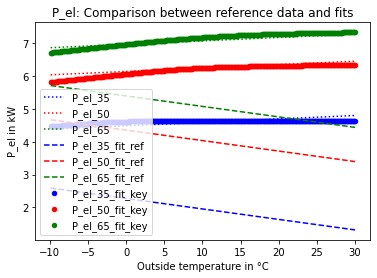

In [13]:
# Calculation for P_el
data_ref['P_el_fit_ref'] = func_simple(para_ref['P_el'], data_ref['T_in'], data_ref['T_out'])
data_ref['P_el_fit_key'] = func_simple(para_key['P_el'], data_ref['T_in'], data_ref['T_out'])
# Plot Simple
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el_35', c='Blue', title='P_el: Comparison between reference data and fits')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el_50', c='Red')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_el', kind='scatter', label='P_el_65', c='Green')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_el_fit_ref', kind='line', label='P_el_35_fit_ref', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_el_fit_ref', kind='line', label='P_el_50_fit_ref', c='Red', linestyle=':')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_el_fit_ref', kind='line', label='P_el_65_fit_ref', c='Green', linestyle=':')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_el_fit_key', kind='line', label='P_el_35_fit_key', c='Blue', linestyle='--')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_el_fit_key', kind='line', label='P_el_50_fit_key', c='Red', linestyle='--')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_el_fit_key', kind='line', label='P_el_65_fit_key', c='Green', linestyle='--')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("P_el in kW")


**Conclusion for P_el:**
- There is a strong deviation between the two fits because of the unsteady course between -10 and 5 °C outside temperature. That's the part, where most of the keymark data is located.
- A solution could be, to limit P_el and fit it again 

Text(0, 0.5, 'P_th in kW')

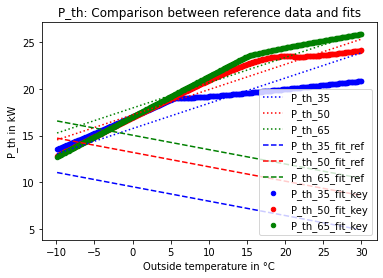

In [14]:
# Calculation for P_th
data_ref['P_th_fit_ref'] = func_simple(para_ref['P_th'], data_ref['T_in'], data_ref['T_out'])
data_ref['P_th_fit_key'] = func_simple(para_key['P_th'], data_ref['T_in'], data_ref['T_out'])
# Plot Simple
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_35', c='Blue', title='P_th: Comparison between reference data and fits')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_50', c='Red')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_65', c='Green')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_th_fit_ref', kind='line', label='P_th_35_fit_ref', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_th_fit_ref', kind='line', label='P_th_50_fit_ref', c='Red', linestyle=':')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_th_fit_ref', kind='line', label='P_th_65_fit_ref', c='Green', linestyle=':')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th_35_fit_key', c='Blue', linestyle='--')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th_50_fit_key', c='Red', linestyle='--')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th_65_fit_key', c='Green', linestyle='--')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("P_th in kW")

**Conclusion for P_th:**
- The quality of the fit based on reference data cannot be achieved.
- It is clear that the keymark data lacks of values at high outside temperatures for a good fit. At high temperatures, the fit underestimates the power by up to 2000W and thus approx. 20% in this range.


Text(0, 0.5, 'COP')

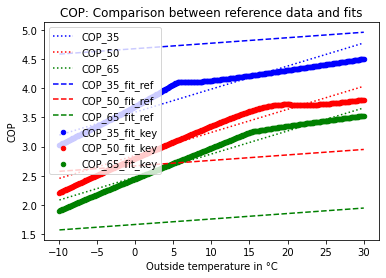

In [15]:
# Calculation for COP
data_ref['COP_fit_ref'] = func_simple(para_ref['COP'], data_ref['T_in'], data_ref['T_out'])
data_ref['COP_fit_key'] = func_simple(para_key['COP'], data_ref['T_in'], data_ref['T_out'])
# Plot Simple
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='COP', kind='scatter', label='COP_35', c='Blue', title='COP: Comparison between reference data and fits')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='COP', kind='scatter', label='COP_50', c='Red')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='COP', kind='scatter', label='COP_65', c='Green')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='COP_fit_ref', kind='line', label='COP_35_fit_ref', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='COP_fit_ref', kind='line', label='COP_50_fit_ref', c='Red', linestyle=':')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='COP_fit_ref', kind='line', label='COP_65_fit_ref', c='Green', linestyle=':')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='COP_fit_key', kind='line', label='COP_35_fit_key', c='Blue', linestyle='--')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='COP_fit_key', kind='line', label='COP_50_fit_key', c='Red', linestyle='--')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='COP_fit_key', kind='line', label='COP_65_fit_key', c='Green', linestyle='--')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("COP")

**Conclusion for COP:**
- The quality of the fit based on reference data cannot be achieved.
- It is clear that the keymark data lacks of values at high outside temperatures for a good fit. At high temperatures, the fit underestimates the power by up to 2000W and thus approx. 20% in this range.


Text(0, 0.5, 'eta')

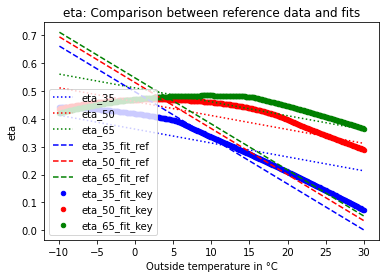

In [16]:
# Calculation for eta
data_ref['eta_fit_ref'] = func_simple(para_ref['eta'], data_ref['T_in'], data_ref['T_out'])
data_ref['eta_fit_key'] = func_simple(para_key['eta'], data_ref['T_in'], data_ref['T_out'])
# Plot Simple
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_35', c='Blue', title='eta: Comparison between reference data and fits')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_50', c='Red')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_65', c='Green')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='eta_fit_ref', kind='line', label='eta_35_fit_ref', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='eta_fit_ref', kind='line', label='eta_50_fit_ref', c='Red', linestyle=':')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='eta_fit_ref', kind='line', label='eta_65_fit_ref', c='Green', linestyle=':')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='eta_fit_key', kind='line', label='eta_35_fit_key', c='Blue', linestyle='--')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='eta_fit_key', kind='line', label='eta_50_fit_key', c='Red', linestyle='--')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='eta_fit_key', kind='line', label='eta_65_fit_key', c='Green', linestyle='--')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("eta")

**Conclusion for eta:**
- The quality of the fit based on reference data cannot be achieved.
- It is clear that the keymark data lacks of values at high outside temperatures for a good fit. At high temperatures, the fit underestimates the power by up to 2000W and thus approx. 20% in this range.


## Calculate P_th from fitted P_el and COP


Text(0, 0.5, 'P_th')

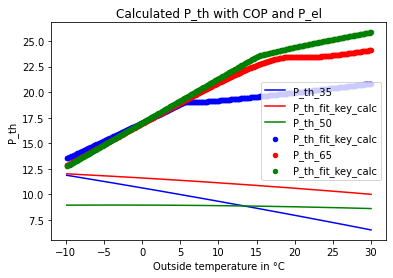

In [26]:
data_ref['P_th_fit_key_calc'] = data_ref['COP_fit_key'] * data_ref['P_el_fit_key']
# 35
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_35',  c='Blue',  title='Calculated P_th with P_th and P_el')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='P_th_fit_key_calc', kind='line', label='P_th_fit_key_calc', c='Blue')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("P_th")
#axes.set_ylim(0,8)
# 50
#fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_50', c='Red', title='Calculated P_th with P_th and P_el')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='P_th_fit_key_calc', kind='line', label='P_th_fit_key_calc', c='Red')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("P_th")
#axes.set_ylim(0,8)
# 65
#fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_th', kind='scatter', label='P_th_65', c='Green', title='Calculated P_th with COP and P_el')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='P_th_fit_key_calc', kind='line', label='P_th_fit_key_calc', c='Green')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("P_th")
#axes.set_ylim(0,8)

**Conclusion for calculated COP:**
- Calculated COP is good for outside temperatures between -20 and 5 °C
- It is clear that the keymark data lacks of values at high outside temperatures for a good fit.
- At high temperatures, the calculated COP is undererstimated up to 0.5 or and thus approx. 20% in this range.


## Calculate eta from fitted COP

Text(0, 0.5, 'eta')

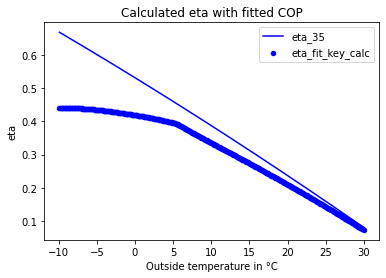

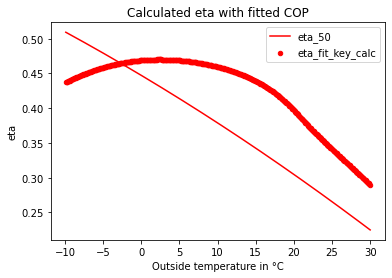

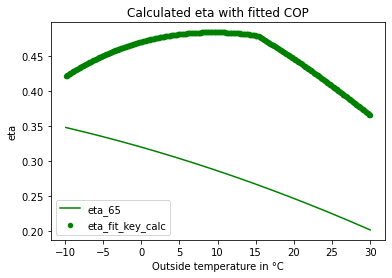

In [18]:
data_ref['eta_fit_key_calc'] = data_ref['COP_fit_key'] / eta_carnot_ref
# 35
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_35',  c='Blue',  title='Calculated eta with fitted COP')
data_ref[data_ref['T_out']==a].plot(ax=axes, x='T_in', y='eta_fit_key_calc', kind='line', label='eta_fit_key_calc', c='Blue')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("eta")
#axes.set_ylim(0,0.6)
# 50
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_50', c='Red', title='Calculated eta with fitted COP')
data_ref[data_ref['T_out']==b].plot(ax=axes, x='T_in', y='eta_fit_key_calc', kind='line', label='eta_fit_key_calc', c='Red')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("eta")
#axes.set_ylim(0,0.6)
# 65
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='eta', kind='scatter', label='eta_65', c='Green', title='Calculated eta with fitted COP')
data_ref[data_ref['T_out']==c].plot(ax=axes, x='T_in', y='eta_fit_key_calc', kind='line', label='eta_fit_key_calc', c='Green')
axes.set_xlabel("Outside temperature in °C")
axes.set_ylabel("eta")
#axes.set_ylim(0,0.6)


**Conclusion for calculated eta**:
- The calculated quality grade based on the fit is relatively good for a target temperature of up to 50 °C.
- As also the other plots showed up: The qualitiy grad is underestimated at high output temperatures

## Conclusion fot fitting method:
- The fitted P_th, P_el and therefore COP and eta are very well for output temperatures up to 50 °C! 
But:
- As the most energy is produced at low output temperatures and low/middle input temperatures the fitting method with keymark data results in good results

# Deviation in seasonal performance factor (SPF) in a one year simulation between reference fit and keymark fit
Input data (outside temperature and flow temperature) are available in 1-minute resolution from another simulation. 

In [19]:
# import data
data = pd.read_csv('Test-Year.csv', delimiter=';', decimal=',')

In [20]:
# Calculate data for P_el and COP
variables=['P_el','COP']
for var in variables:
    data[var+'_fit_ref'] = func_simple(para_ref[var], data['T_in'], data['T_out'])
    data[var+'_fit_key'] = func_simple(para_key[var], data['T_in'], data['T_out'])

data.loc[data['T_out'] == 0, ['P_el_fit_ref','P_el_fit_key','COP_fit_ref','COP_fit_key']] = 0 # Set 0 where the heat pump was not running
# Calculate data for COP 
var='P_th'
data[var+'_fit_ref'] = data['COP_fit_ref'] * data['P_el_fit_ref']
data[var+'_fit_key'] = data['COP_fit_key'] * data['P_el_fit_key']
data.loc[data['T_out'] == 0, ['P_th_fit_ref','P_th_fit_key']] = 0 # Set 0 where the heat pump was not running


(0.0, 120000.0)

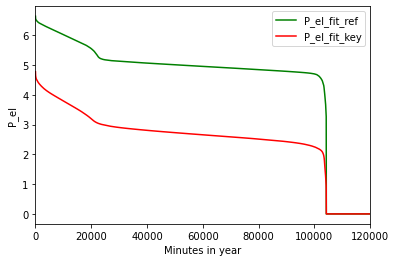

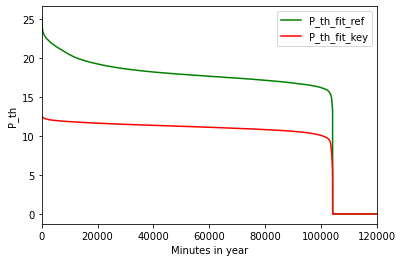

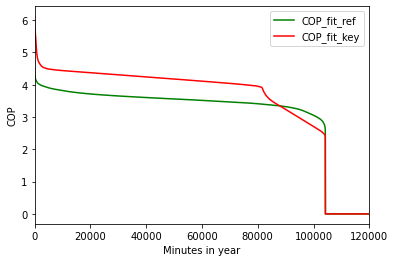

In [21]:
# Duration curves
# P_el
fig, axes = plt.subplots(nrows=1, ncols=1)
data_sort = data.sort_values(by=['P_el_fit_ref'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='P_el_fit_ref', kind='line', c='Green')
data_sort = data.sort_values(by=['P_el_fit_key'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='P_el_fit_key', kind='line', c='Red')
axes.set_title ='Comparison of electrical performance'
axes.set_xlabel("Minutes in year")
axes.set_ylabel("P_el")
axes.set_xlim(0,120000)
#axes.set_ylim(0,3)
# P_th
fig, axes = plt.subplots(nrows=1, ncols=1)
data_sort = data.sort_values(by=['P_th_fit_ref'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='P_th_fit_ref', kind='line', c='Green')
data_sort = data.sort_values(by=['P_th_fit_key'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='P_th_fit_key', kind='line', c='Red')
axes.set_title ='Comparison of thermal performance'
axes.set_xlabel("Minutes in year")
axes.set_ylabel("P_th")
axes.set_xlim(0,120000)
#axes.set_ylim(0,6)
# COP
fig, axes = plt.subplots(nrows=1, ncols=1)
data_sort = data.sort_values(by=['COP_fit_ref'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='COP_fit_ref', kind='line', c='Green')
data_sort = data.sort_values(by=['COP_fit_key'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='COP_fit_key', kind='line', c='Red')
axes.set_title ='Comparison of the COPs'
axes.set_xlabel("Minutes in year")
axes.set_ylabel("COP")
axes.set_xlim(0,120000)
#axes.set_ylim(2,6)

In [22]:
# thermal energy
print(data['P_th_fit_ref'].mean() * 8760, 'kWh with reference data')
print(data['P_th_fit_key'].mean() * 8760, 'kWh with keymark data')

31523.309450920227 kWh with reference data
19338.17852543118 kWh with keymark data


In [23]:
# electrical energy
print(data['P_el_fit_ref'].mean() * 8760, 'kWh with reference data')
print(data['P_el_fit_key'].mean() * 8760, 'kWh with keymark data')

8936.850400168969 kWh with reference data
4962.11193762311 kWh with keymark data


In [24]:
# SPF
print(data['P_th_fit_ref'].mean() / data['P_el_fit_ref'].mean(), '"SPF with reference data"')
print(data['P_th_fit_key'].mean() / data['P_el_fit_key'].mean(), '"SPF with keymark data"') 

3.5273399508090924 "SPF with reference data"
3.8971669258018222 "SPF with keymark data"


Text(0, 0.5, 'P_th')

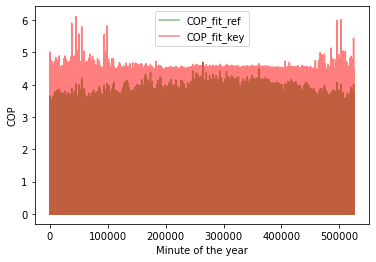

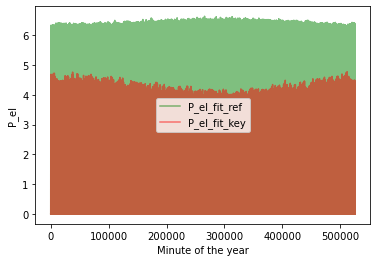

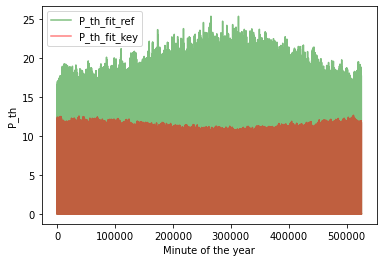

In [25]:
# Line-Plots

# COP
fig, axes = plt.subplots(nrows=1, ncols=1)
data.plot(ax=axes, y='COP_fit_ref', kind='line', c='Green', alpha=0.5)
data.plot(ax=axes, y='COP_fit_key', kind='line', c='Red', alpha=0.5)
axes.set_title ='Comparison of COP'
axes.set_xlabel("Minute of the year")
axes.set_ylabel("COP")
# P_el
fig, axes = plt.subplots(nrows=1, ncols=1)
data.plot(ax=axes, y='P_el_fit_ref', kind='line', c='Green', alpha=0.5)
data.plot(ax=axes, y='P_el_fit_key', kind='line', c='Red', alpha=0.5)
axes.set_title ='Comparison of electrical performance'
axes.set_xlabel("Minute of the year")
axes.set_ylabel("P_el")
# P_th
fig, axes = plt.subplots(nrows=1, ncols=1)
data.plot(ax=axes, y='P_th_fit_ref', kind='line', c='Green', alpha=0.5)
data.plot(ax=axes, y='P_th_fit_key', kind='line', c='Red', alpha=0.5)
axes.set_title ='Comparison of thermal performance'
axes.set_xlabel("Minute of the year")
axes.set_ylabel("P_th")


In [29]:
data_key['COP']

0     4.190027
1     3.000211
2     5.259976
3     4.099906
4     6.057386
5     4.899388
6     5.882353
7     5.000000
8     3.890384
9     2.800000
10    4.928910
11    3.609858
12    6.047967
13    4.919499
14    5.098855
15    3.799922
16    6.097561
17    4.698512
18    6.102784
19    5.000000
20    5.599214
21    5.000000
22    5.973740
23    5.370339
24    5.772606
25    4.968071
26    5.973740
27    5.571472
Name: COP, dtype: float64